<a href="https://colab.research.google.com/github/Kriti-Saxena/A-B-testing-User-Retention/blob/main/A_B_Testing_User_Retention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Business Problem:**
Cookie cats is a game and as the players progress through the game, they are encouraged and to make in-app purchases. This A/B test will analyze the result of users when they move from gate 30 to gate 40 and understand the retention of players through game rounds 


In part one of this notebook, we conduct some exploratory data analysis looking at the relationship between retention variable and the user database. It was seen that over 3900 users downloaded the app but never played the game and as the level progressed, number of users and engagement went down. This analysis helps leadership understand consumer behaviour and strategize marketing initiatives to increase the retention ratio after 1 and 7 days of installing the game. 


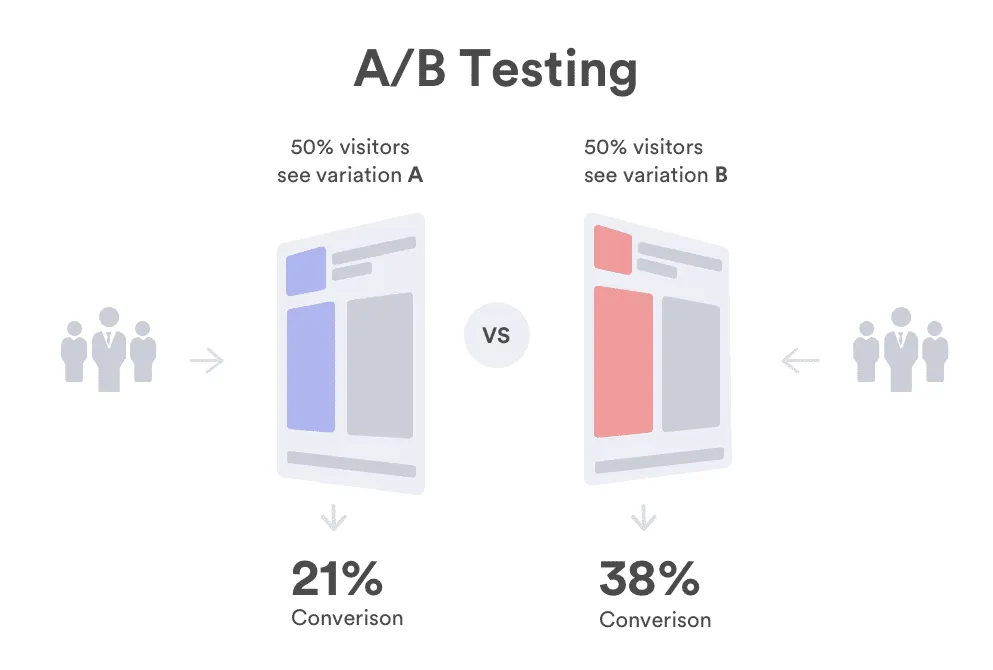



Add data card 

#### **Importing Libraries**

In [41]:
import numpy as np 
import pandas as pd
from scipy import stats # Hypothsis Test
from scipy.stats import shapiro # Hypothesis Test
import matplotlib.pyplot as plt # For data vizualisation 
from google.colab import drive
drive.mount('/content/drive') # Mount Google drive
import os
import seaborn as sns # For faucet charts 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Data**

In [42]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cookie_cats.csv')
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [43]:
data.info() # check for null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [45]:
data.isnull().sum() # Check for missing values

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

### **Exploratory Data Analysis**

In [46]:
# Check for unique values 
print(data.userid.nunique() == data.shape[0])

True


In [47]:
# Looking at sum of game rounds summary 
data.describe([0.05, 0.10, 0.20, 0.80, 0.90, 0.95, 0.99])[["sum_gamerounds"]].T

,count,mean,std,min,5%,10%,20%,50%,80%,90%,95%,99%,max
sum_gamerounds,90189.0,51.872457,195.050858,0.0,1.0,1.0,3.0,16.0,67.0,134.0,221.0,493.0,49854.0


Since version is essentially divinding the users into groups, let's look at its distribution and summary stats 

In [48]:
data.groupby("version").sum_gamerounds.agg(["count", "median", "mean", "std", "max"])

,count,median,mean,std,max
version,,,,,
gate_30,44700,17.0,52.456264,256.716423,49854
gate_40,45489,16.0,51.298776,103.294416,2640


Looking at the distribution for outliers 

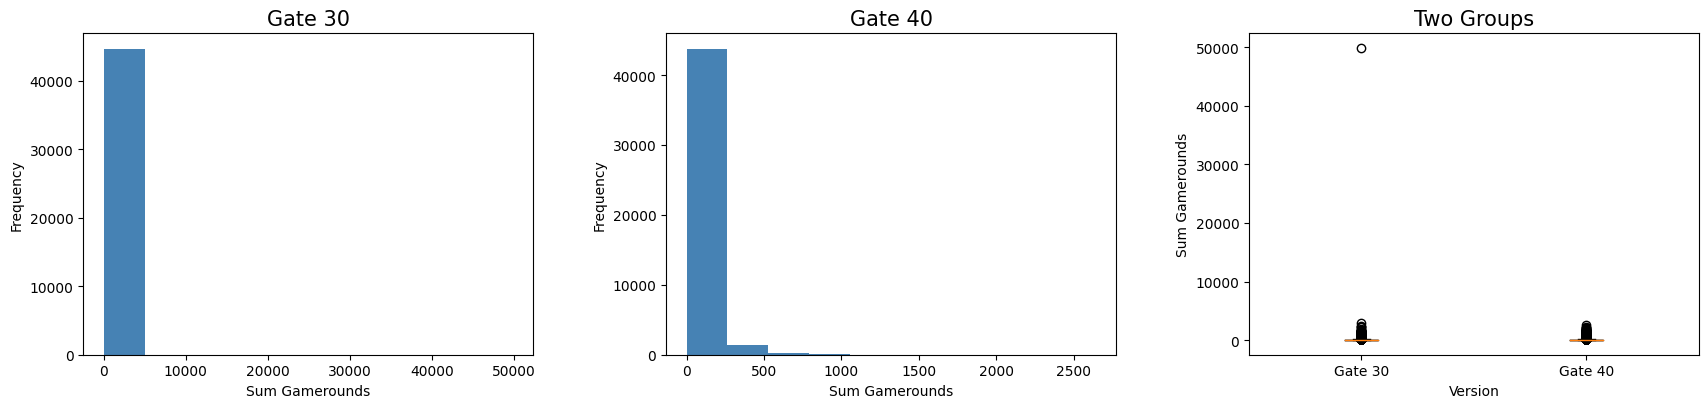

In [49]:
fig, axes = plt.subplots(1, 3, figsize=(18,5))

axes[0].hist(data[data.version == "gate_30"].sum_gamerounds, color="steelblue")
axes[0].set_xlabel("Sum Gamerounds")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Gate 30", fontsize=15)


axes[1].hist(data[data.version == "gate_40"].sum_gamerounds, color="steelblue")
axes[1].set_xlabel("Sum Gamerounds")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Gate 40", fontsize=15)


axes[2].boxplot([data[data.version == "gate_30"].sum_gamerounds, data[data.version == "gate_40"].sum_gamerounds])
axes[2].set_xticklabels(["Gate 30", "Gate 40"])
axes[2].set_xlabel("Version")
axes[2].set_ylabel("Sum Gamerounds")
axes[2].set_title("Two Groups", fontsize=15)


fig.tight_layout(pad=4)
plt.show()


These are some extreme values/outliers in the dataset which was also seen in the summary statistics table. We will remove the outlier and check the distribution again 

In [50]:
# removing the outlier (max number)
data = data[data.sum_gamerounds < data.sum_gamerounds.max()]

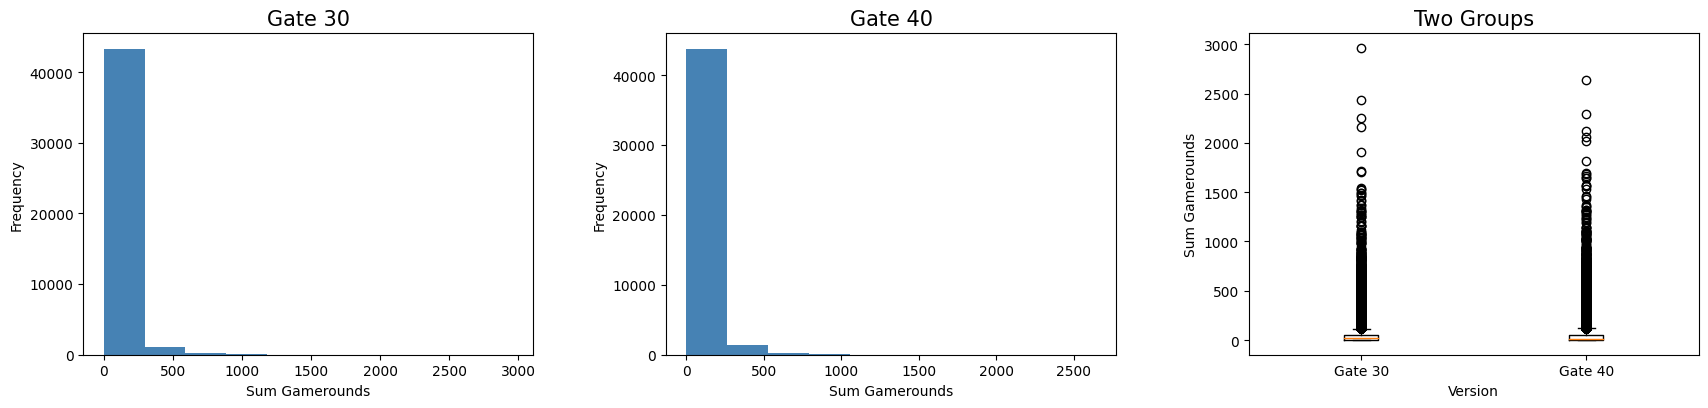

In [51]:
fig, axes = plt.subplots(1, 3, figsize=(18,5))

axes[0].hist(data[data.version == "gate_30"].sum_gamerounds, color="steelblue")
axes[0].set_xlabel("Sum Gamerounds")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Gate 30", fontsize=15)


axes[1].hist(data[data.version == "gate_40"].sum_gamerounds, color="steelblue")
axes[1].set_xlabel("Sum Gamerounds")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Gate 40", fontsize=15)


axes[2].boxplot([data[data.version == "gate_30"].sum_gamerounds, data[data.version == "gate_40"].sum_gamerounds])
axes[2].set_xticklabels(["Gate 30", "Gate 40"])
axes[2].set_xlabel("Version")
axes[2].set_ylabel("Sum Gamerounds")
axes[2].set_title("Two Groups", fontsize=15)


fig.tight_layout(pad=4)
plt.show()

The distrubution looks better post removal of the outlier, now zooming in the distribution :

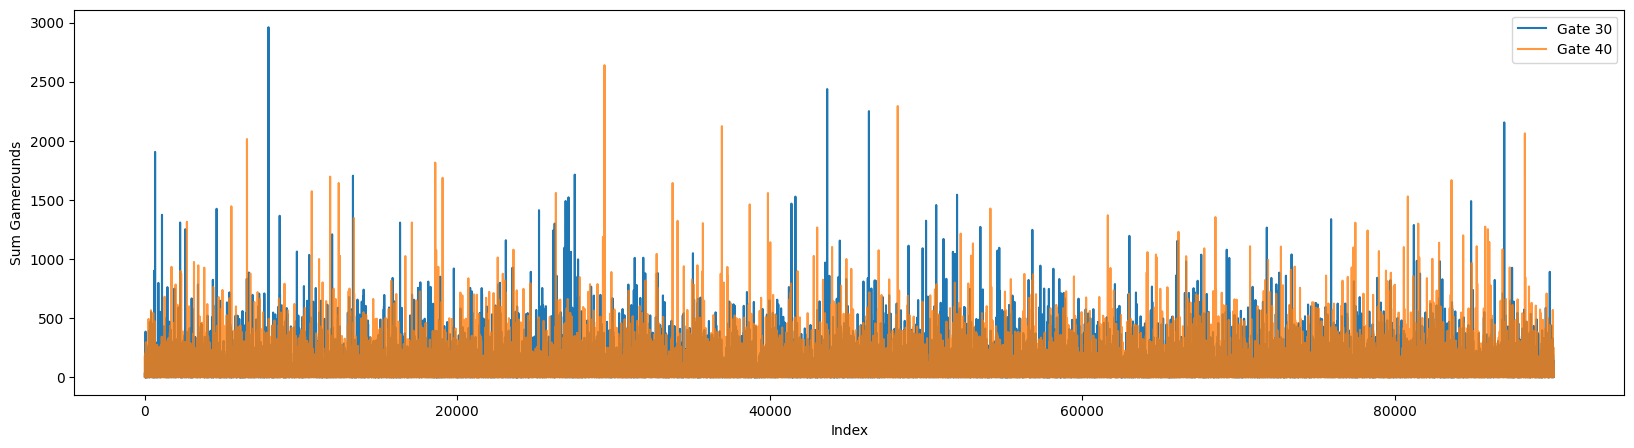

In [52]:
data[data.version == "gate_30"].reset_index().set_index("index").sum_gamerounds.plot(
    legend=True,
    label="Gate 30",
    figsize=(20,5)
)


data[data.version == "gate_40"].reset_index().set_index("index").sum_gamerounds.plot(
    legend=True,
    label="Gate 40",
    alpha=0.8
)


plt.xlabel("Index")
plt.ylabel("Sum Gamerounds")


plt.show()

#### Exploratory data analysis questions
1. Everyone who installed the game played it atleast once ?
2. How many game rounds have the most number of players
3. Number of players that reached gate 30 and 40

In [24]:
data.groupby("sum_gamerounds").userid.count().reset_index().head(20)

,sum_gamerounds,userid
0,0,3994
1,1,5538
2,2,4606
3,3,3958
4,4,3629
5,5,2992
6,6,2861
7,7,2379
8,8,2267
9,9,2013


3994 users installed games but never played the game 

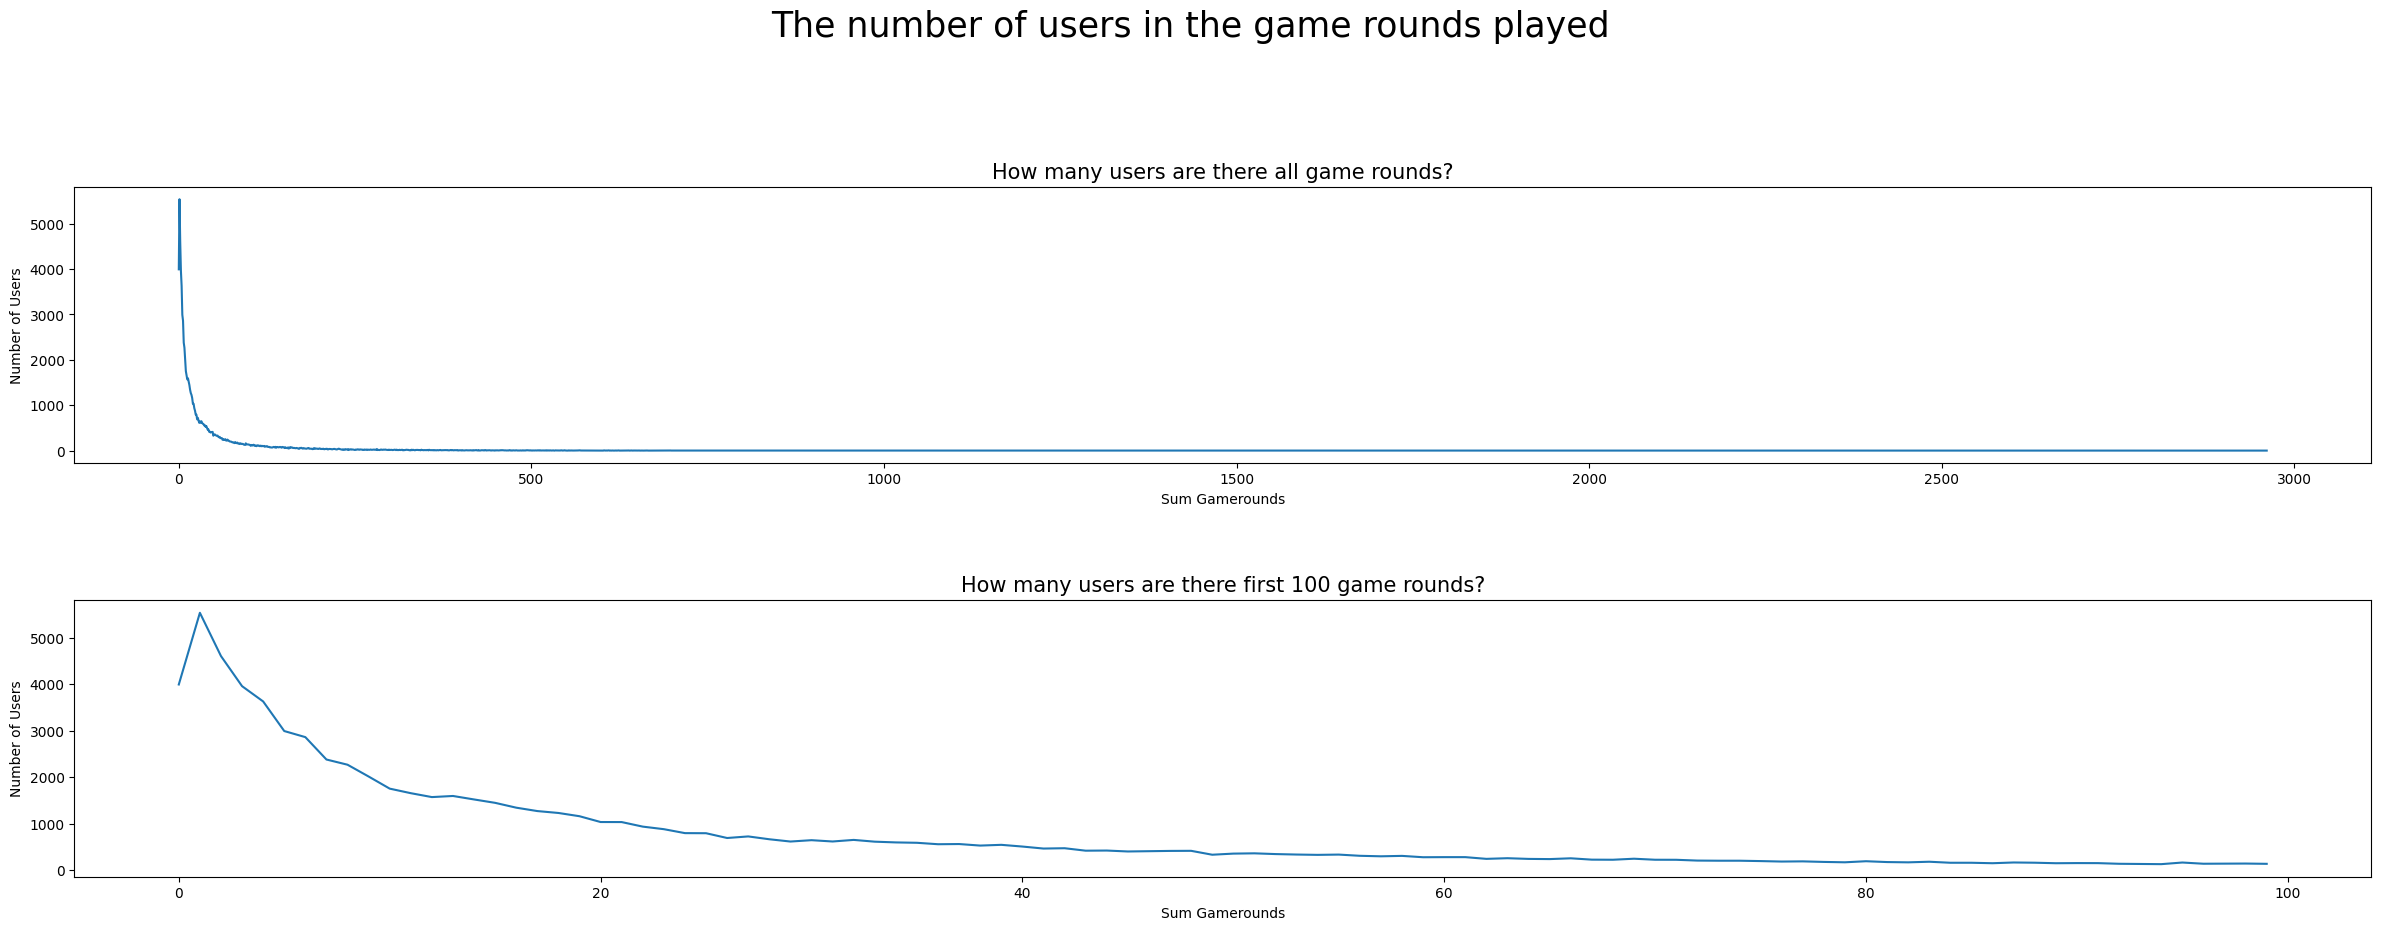

In [53]:
fig, axes = plt.subplots(2, 1, figsize=(25,10))

data.groupby("sum_gamerounds").userid.count().plot(ax=axes[0])
axes[0].set_xlabel("Sum Gamerounds")
axes[0].set_ylabel("Number of Users")
axes[0].set_title("How many users are there all game rounds?", fontsize=15)

# closing up on first 100 rounds
data.groupby("sum_gamerounds").userid.count()[:100].plot(ax=axes[1])
axes[1].set_xlabel("Sum Gamerounds")
axes[1].set_ylabel("Number of Users")
axes[1].set_title("How many users are there first 100 game rounds?", fontsize=15)


fig.suptitle("The number of users in the game rounds played", fontsize=25)


fig.tight_layout(pad=5)
plt.show()

The number of players are reducing as the number of game rounds increase. With increase in the level, number of players descrease 

In [54]:
data.groupby("sum_gamerounds").userid.count().loc[[30,40]]

sum_gamerounds
30    642
40    505
Name: userid, dtype: int64

In [55]:
data.groupby("version").sum_gamerounds.agg(["count", "median", "mean", "std", "max"]) # looking at summary stats after removing the outlier

,count,median,mean,std,max
version,,,,,
gate_30,44699,17.0,51.342111,102.057598,2961
gate_40,45489,16.0,51.298776,103.294416,2640


### **Closing in on the retention variable**
Calculating the ratio of retention after 1 day and 7 days of installing the game

In [56]:
pd.DataFrame({"ret_1_count": data["retention_1"].value_counts(),
              "ret_7_count": data["retention_7"].value_counts(),
              "ret_1_ratio": data["retention_1"].value_counts() / len(data),
              "ret_7_ratio": data["retention_7"].value_counts() / len(data)})

,ret_1_count,ret_7_count,ret_1_ratio,ret_7_ratio
False,50035,73408,0.554786,0.813944
True,40153,16780,0.445214,0.186056


According to the ratio, approx. 81% of the users did not play the game after 7 days of installing. 55% of users did not play the game after 1 say of installing

In [57]:
#data["Retention_1"] = np.where((data.retention_1 == True) & (data.retention_1 == True), 1,0)
data.groupby(["version", "retention_1"]).sum_gamerounds.agg(["count", "median", "mean", "std", "max"])

count  median       mean         std   max
version retention_1                                            
gate_30 False        24665     6.0  16.359092   36.528426  1072
        True         20034    48.0  94.411700  135.037697  2961
gate_40 False        25370     6.0  16.340402   35.925756  1241
        True         20119    49.0  95.381182  137.887256  2640

In [58]:
data["Retention"] = np.where((data.retention_1 == True) & (data.retention_7 == True), 1,0)
data.groupby(["version", "Retention"]).sum_gamerounds.agg(["count", "median", "mean", "std", "max"])

count  median        mean         std   max
version Retention                                             
gate_30 0          38023    12.0   28.070273   48.017452  1072
        1           6676   127.0  183.886309  189.626390  2961
gate_40 0          38983    12.0   28.103353   48.927850  2640
        1           6506   133.0  190.282355  194.220077  2294

Similar results are seen when the number of users who came and did not come 1 day and 7 days after the game was installing.  

In [59]:
data["NewRetention"] = list(map(lambda x,y: str(x)+"-"+str(y), data.retention_1, data.retention_7))
data.groupby(["version", "NewRetention"]).sum_gamerounds.agg(["count", "median", "mean", "std", "max"]).reset_index()

,version,NewRetention,count,median,mean,std,max
0,gate_30,False-False,22840,6.0,11.819746,21.642643,981
1,gate_30,False-True,1825,43.0,73.169315,93.222330,1072
2,gate_30,True-False,13358,33.0,49.694490,58.125396,918
3,gate_30,True-True,6676,127.0,183.886309,189.626390,2961
4,gate_40,False-False,23597,6.0,11.913294,20.901020,547
5,gate_40,False-True,1773,47.0,75.261139,94.478048,1241
6,gate_40,True-False,13613,32.0,50.025490,60.924587,2640
7,gate_40,True-True,6506,133.0,190.282355,194.220077,2294


## **Setting Up A/B test**

In [60]:
# Forming the groups
data["version"] = np.where(data.version == "gate_30", "A", "B")
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7,Retention,NewRetention
0,116,A,3,False,False,0,False-False
1,337,A,38,True,False,0,True-False
2,377,B,165,True,False,0,True-False
3,483,B,1,False,False,0,False-False
4,488,B,179,True,True,1,True-True


Before we move on with the testing, we need to check the data for certain assumptions 
1. Normality (Shapiro-Wilk) 
2. Variance (Levene)
3. Difference in mean (Independent Samples t-test)
4. Difference for median (Mann-Whitney U Test)

**If normality and homogeneity tests pass, then a parametric t-test is performed. If normality test fails or homogeneity test fails, then a non-parametric Mann-Whitney U test is performed**

In [63]:
def AB_Test(dataframe, group, target):
    
    from scipy.stats import shapiro
    import scipy.stats as stats
    
    # Split A/B
    groupA = dataframe[dataframe[group] == "A"][target]
    groupB = dataframe[dataframe[group] == "B"][target]
    
    # Normality (Shapiro-Wilk Test)
    # H0 = The data is normally distributed; H1: The data is not normally distributed
    p_value_A = shapiro(groupA)[1] < 0.05
    p_value_B = shapiro(groupB)[1] < 0.05
    # H0: Distribution is Normal! - False
    # H1: Distribution is not Normal! - True
    
    if (p_value_A == False) & (p_value_B == False): # "H0: Normal Distribution"
        # Assumption: Homogeneity of variances
        leveneTest = stats.levene(groupA, groupB)[1] < 0.05
        # H0: Homogeneity: False
        # H1: Heterogeneous: True
        
        if leveneTest == False:
            # Homogeneity(Levene)
            # H0 = The data is homogeneous; H1: The data is not homogeneuos
            ttest = stats.ttest_ind(groupA, groupB, equal_var=True)[1]
            # H0: M1 == M2 - False
            # H1: M1 != M2 - True
        else:
            # Heterogeneous
            ttest = stats.ttest_ind(groupA, groupB, equal_var=False)[1]
            # H0: M1 == M2 - False
            # H1: M1 != M2 - True
    else:
        # Non-Parametric Test (Mann-Whitney U Test)
        ttest = stats.mannwhitneyu(groupA, groupB)[1] 
        # H0: M1 == M2 - False
        # H1: M1 != M2 - True
        

    temp = pd.DataFrame({
        "AB Hypothesis":[ttest < 0.05], 
        "p-value":[ttest]
    })
    temp["Test Type"] = np.where((p_value_A == False) & (p_value_B == False), "Parametric", "Non-Parametric")
    temp["AB Hypothesis"] = np.where(temp["AB Hypothesis"] == False, "Fail to Reject H0", "Reject H0")
    temp["Comment"] = np.where(temp["AB Hypothesis"] == "Fail to Reject H0", "A/B groups are similar!", "A/B groups are not similar!")
    

    if (p_value_A == False) & (p_value_B == False):
        temp["Homogeneity"] = np.where(leveneTest == False, "Yes", "No")
        temp = temp[["Test Type", "Homogeneity","AB Hypothesis", "p-value", "Comment"]]
    else:
        temp = temp[["Test Type","AB Hypothesis", "p-value", "Comment"]]
    

    print("# A/B Testing Hypothesis")
    print("H0: A == B")
    print("H1: A != B", "\n")
    
    return temp
    
    
    
# Apply A/B Testing
AB_Test(dataframe=data, group = "version", target = "sum_gamerounds")

# A/B Testing Hypothesis
H0: A == B
H1: A != B 



/usr/local/lib/python3.9/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,Test Type,AB Hypothesis,p-value,Comment
0,Non-Parametric,Fail to Reject H0,0.050892,A/B groups are similar!


In [64]:
data.groupby("version").retention_1.mean(), data.groupby("version").retention_7.mean()

(version
 A    0.448198
 B    0.442283
 Name: retention_1, dtype: float64,
 version
 A    0.190183
 B    0.182000
 Name: retention_7, dtype: float64)

# Conclusion

The data was tested for diffrent OLS assumptions like normaliy, homogenity and once normality was not found, a non-parametric test, Mann Whiteny U was conducted for better results. According to that, A/B groups are not similar

There is a statistical difference between two groups, i.e the ones that move from gate 30 to 40 and the ones that don't 